# Chirped Z-transform for vector XY scheme to X scheme


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib as mpl

In [3]:
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)


In [4]:
mpl.rcParams['figure.dpi'] = 125
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.formatter.useoffset'] = False
mpl.rcParams['savefig.pad_inches'] = 0.075
mpl.rcParams['figure.subplot.hspace'] = 0.075
mpl.rcParams['figure.subplot.wspace'] = 0.075
mpl.rcParams['figure.subplot.left'] = 0.075

In [5]:
import warnings

warnings.filterwarnings('ignore')


In [6]:
from diffractio import degrees, mm, um, nm
from diffractio import np, plt, sp

from diffractio.scalar_fields_XY import Scalar_field_X
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY
from diffractio.utils_math import Bluestein_dft_xy


In [7]:
from diffractio.vector_fields_XY import Vector_field_XY
from diffractio.vector_sources_XY import Vector_source_XY
from diffractio.vector_masks_XY import Vector_mask_XY

In [8]:
from numpy import (linspace, sin, cos, arcsin, arctan2, exp, sqrt, pi,
                   meshgrid, isnan, tile, real, angle, sign, mod, ones, zeros)
from numpy.fft import fft, ifft, fftshift

## Example

In [9]:
size = 25 * um
x0 = np.linspace(-size / 2, size / 2, 512)
y0 = np.linspace(-size / 2, size / 2, 512)

focal = 16 * um
wavelength = 0.6328 * um


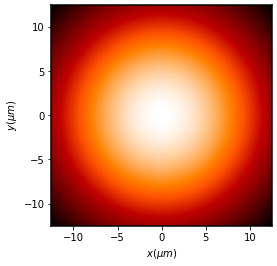

In [10]:
u0 = Scalar_source_XY(x0, y0, wavelength)
u0.gauss_beam(r0=(0, 0),
              w0=(32 * um, 32 * um),
              z0=0 * um,
              A=1,
              theta=0. * degrees,
              phi=0 * degrees)

u0.draw()

t1 = Scalar_mask_XY(x0, y0, wavelength)

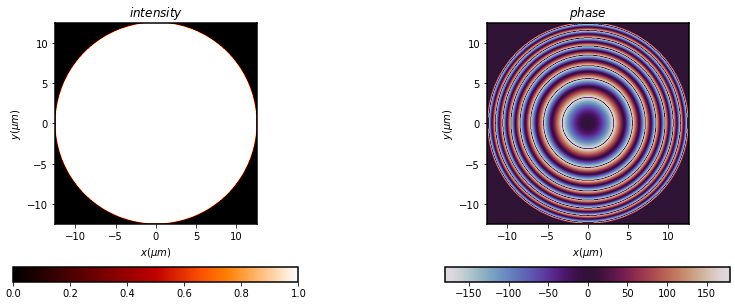

In [11]:
t = Scalar_mask_XY(x0, y0, wavelength)
t.lens(r0=(0, 0), focal=focal, radius=size / 2)
t.draw('field');


In [36]:
u1 = t * u0

EM1 = Vector_source_XY(x0, y0, wavelength)
EM1.constant_wave(u=u1, v=(1, 0))
#EM1.azimuthal_wave(u=u1, r0=(0, 0), radius=(20, 20))
#EM1.radial_wave(u=u1, r0=(0, 0), radius=(20, 20))


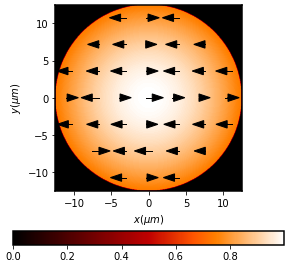

In [37]:
EM1.draw(kind='ellipses', amplification=0.25, num_ellipses=(7, 7), color_line='k')


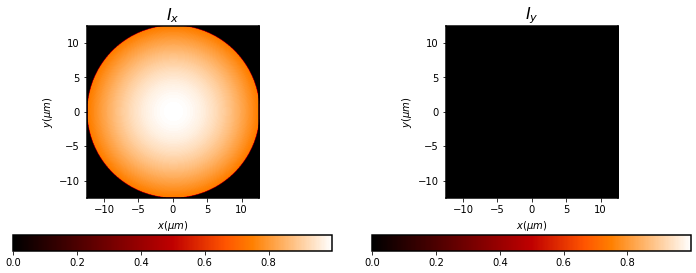

In [38]:
EM1.draw('intensities', logarithm=0);


## Algorithm

# Execution

## xout: 0D, yout: 0D, z: 0D


In [39]:
x_out = 0.
y_out = 0.
z = focal


In [40]:
%%time
EM2_1D=EM1.CZT(z, x_out, y_out)
print(EM2_1D)


((12.01931943234928-2.910555097903726j), 0j, (-3.3306690738754696e-16-5.551115123125783e-16j))
CPU times: user 241 ms, sys: 24.2 ms, total: 266 ms
Wall time: 265 ms


## xout: 1D, yout: 0D, z: 0D


In [41]:
size_out = 16 * um
x_out = np.linspace(-size_out / 2, size_out / 2, 512)
y_out = 0.
z = focal


CPU times: user 312 ms, sys: 31.4 ms, total: 343 ms
Wall time: 342 ms


<AxesSubplot:xlabel='x ($\\mu$m)', ylabel='I(x)'>

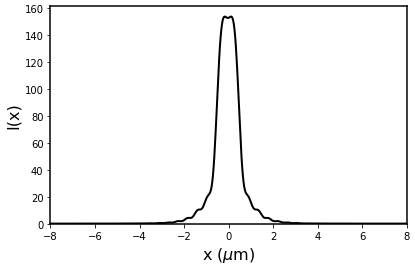

In [42]:
%%time
EM2_1D=EM1.CZT(z, x_out, y_out)
EM2_1D.draw('intensity');

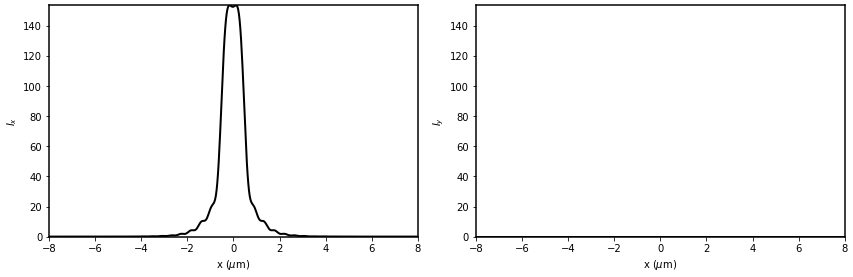

In [43]:
EM2_1D.draw('intensities');


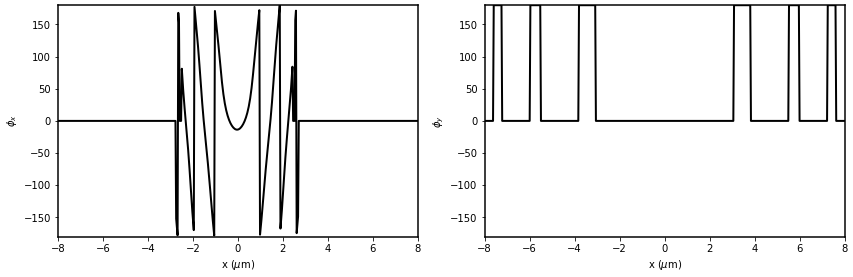

In [44]:
EM2_1D.draw('phases');

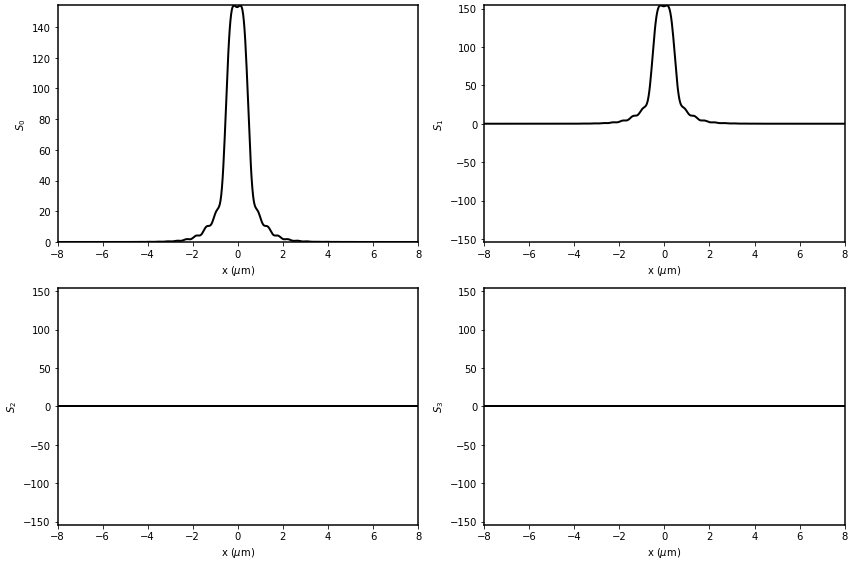

In [45]:
EM2_1D.draw('stokes');

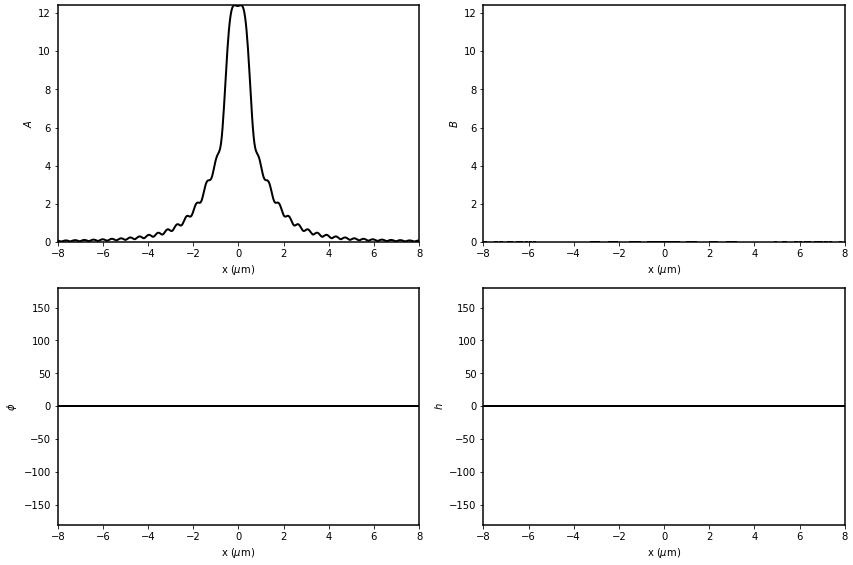

In [46]:
EM2_1D.draw('param_ellipses');


## xout: 0D, yout: 0D, z: 1D


In [47]:
x_out = 0.
y_out = 0.
z = np.linspace(focal - 4 * um - 6 * um, focal - 2 * um + 6 * um, 64)


In [48]:
%%time
EM2=EM1.CZT(z, x_out, y_out, verbose=True);


CPU times: user 13.4 s, sys: 317 ms, total: 13.7 s
Wall time: 13.7 s


<AxesSubplot:xlabel='z ($\\mu$m)', ylabel='I(z)'>

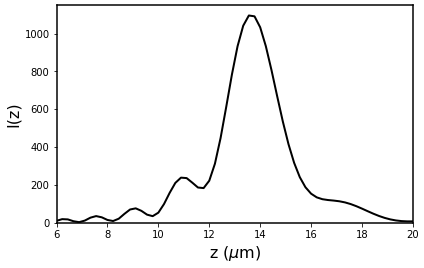

In [49]:
EM2.draw('intensity')


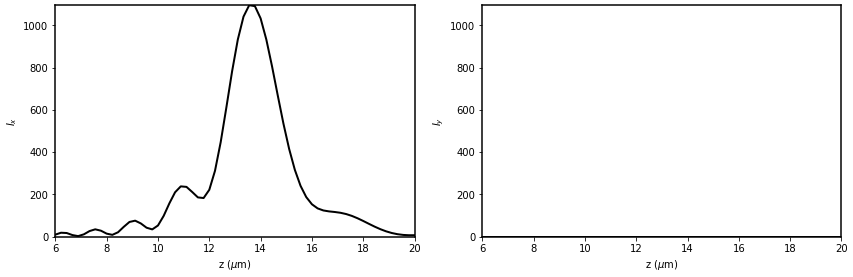

In [50]:
EM2.draw('intensities');


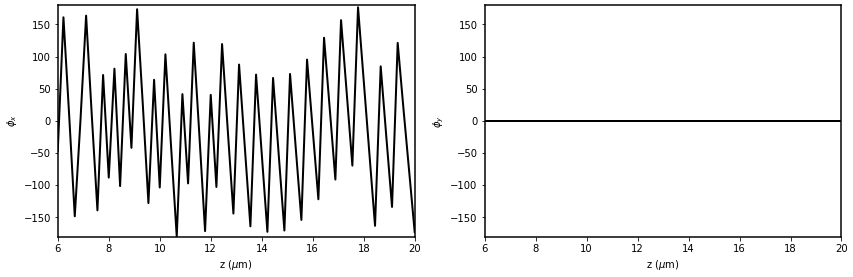

In [51]:
EM2.draw('phases');


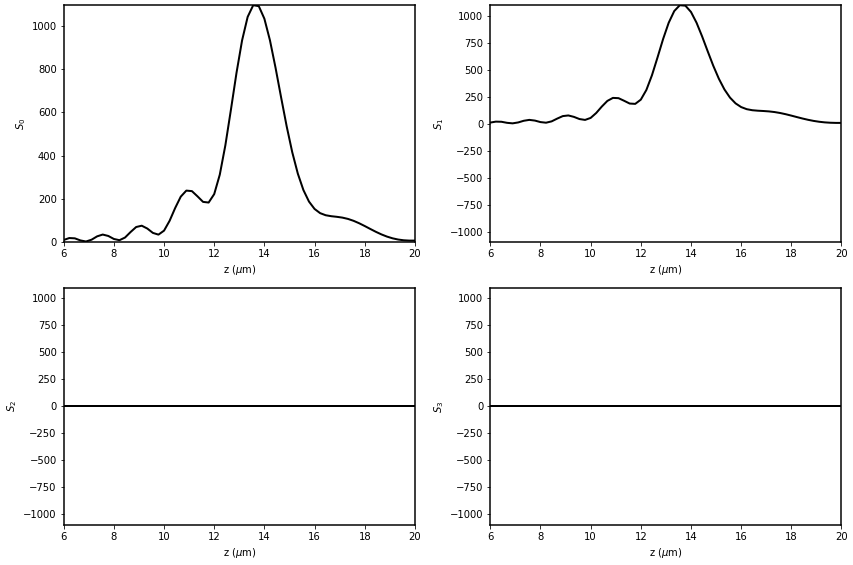

In [52]:
EM2.draw('stokes');


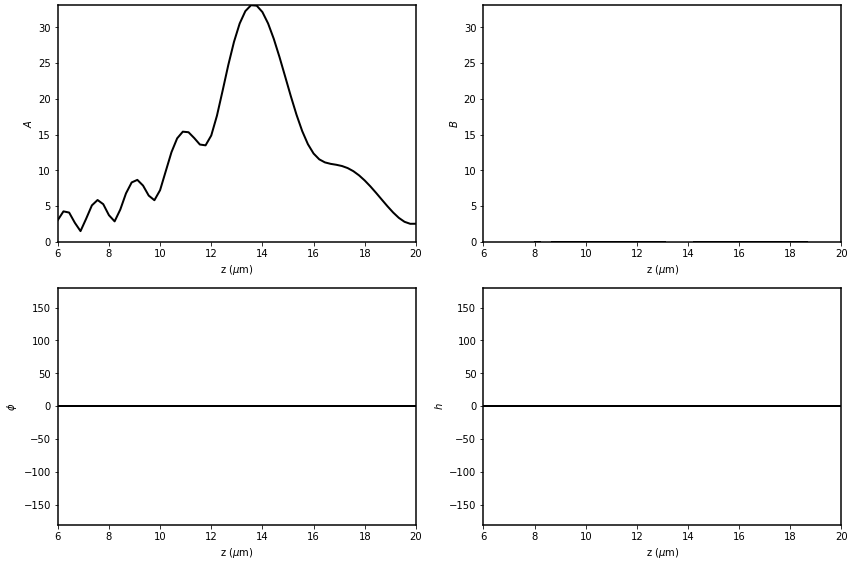

In [53]:
EM2.draw('param_ellipses');


## xout: 1D, yout: 0D, z: 1D


In [54]:
size_out = 5 * um
x_out = np.linspace(-size_out / 2, size_out / 2, 256)
y_out = 0.
z = np.linspace(focal - 2 * um - 6 * um, focal - 2 * um + 6 * um, 128)


In [55]:
%%time
EM2=EM1.CZT(z, x_out, y_out, verbose=True)


CPU times: user 28.6 s, sys: 2.64 s, total: 31.2 s
Wall time: 31.2 s


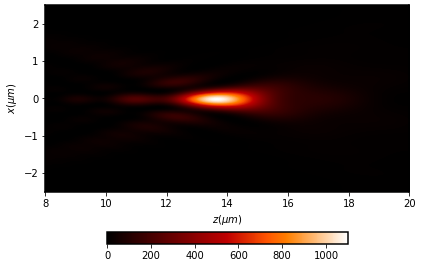

In [56]:
EM2.draw('intensity');

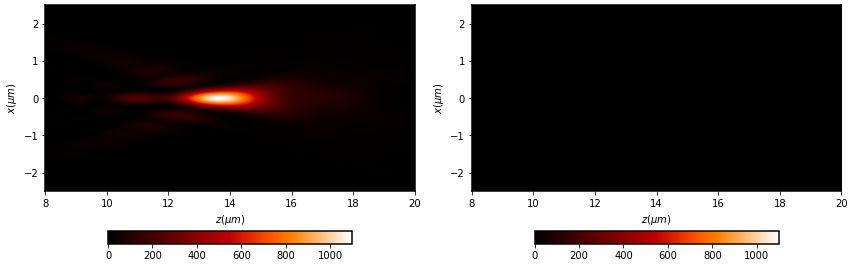

In [57]:
EM2.draw('intensities');

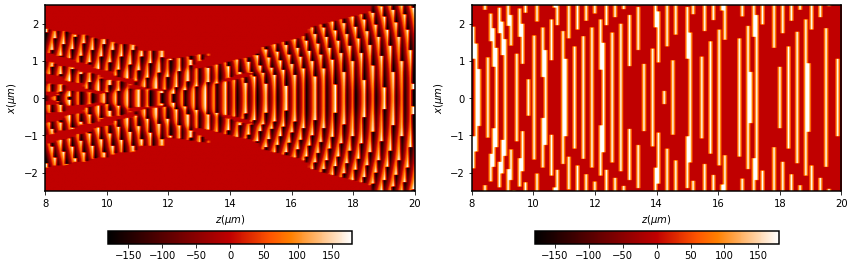

In [58]:
EM2.draw('phases');
plt.savefig('test.png')


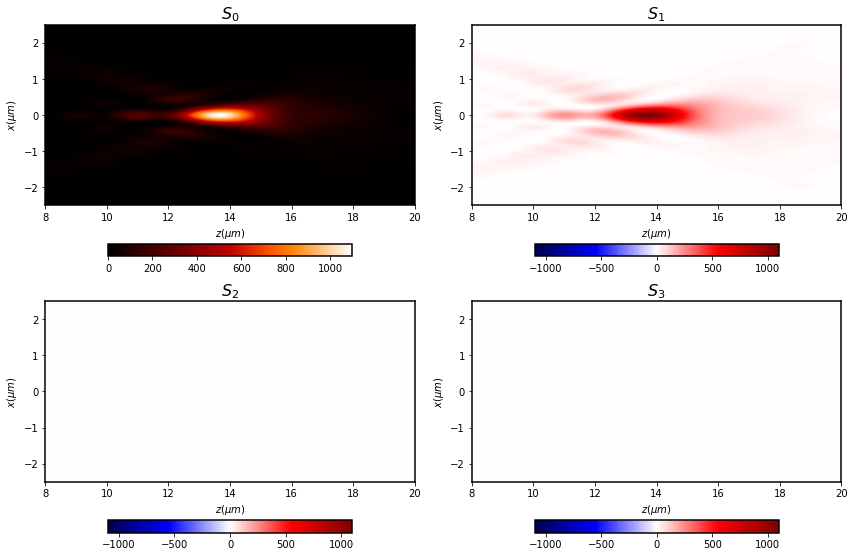

In [59]:
EM2.draw('stokes', logarithm=0);

## xout: 1D, yout: 1D, z: 0D


In [70]:
size_out = 3 * um
x_out = np.linspace(-size_out / 2, size_out / 2, 256)
y_out = np.linspace(-size_out / 2, size_out / 2, 256)
z = focal-2

In [71]:
%%time
EM2=EM1.CZT(z, x_out, y_out)


CPU times: user 332 ms, sys: 35.4 ms, total: 367 ms
Wall time: 366 ms


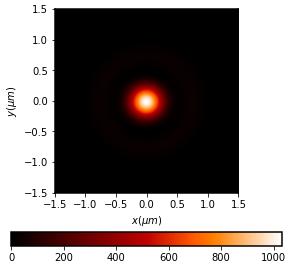

In [72]:
EM2.draw('intensity');


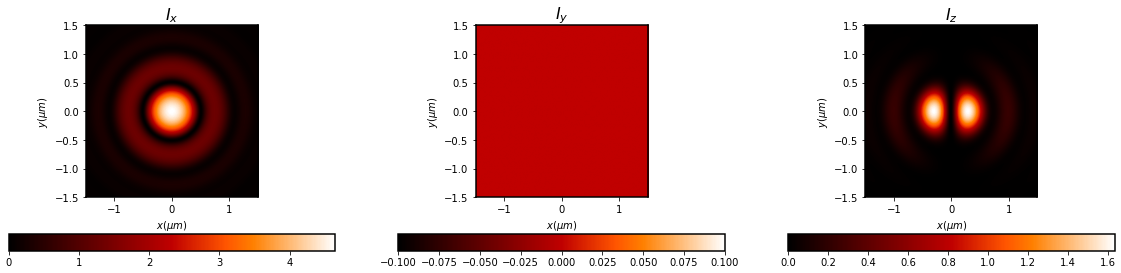

In [73]:
EM2.draw('intensities', logarithm=1e-1);


(<AxesSubplot:title={'center':'$I_r$'}, xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <AxesSubplot:title={'center':'$I_z$'}, xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>)

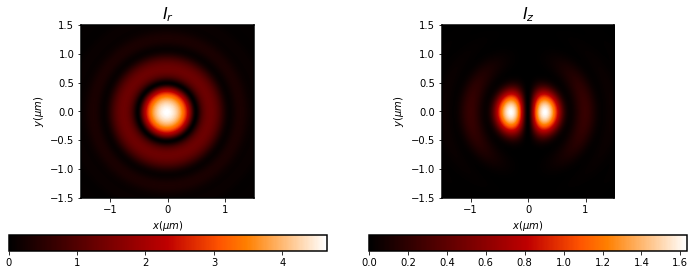

In [74]:
EM2.draw('intensities_rz', logarithm=1e-1)


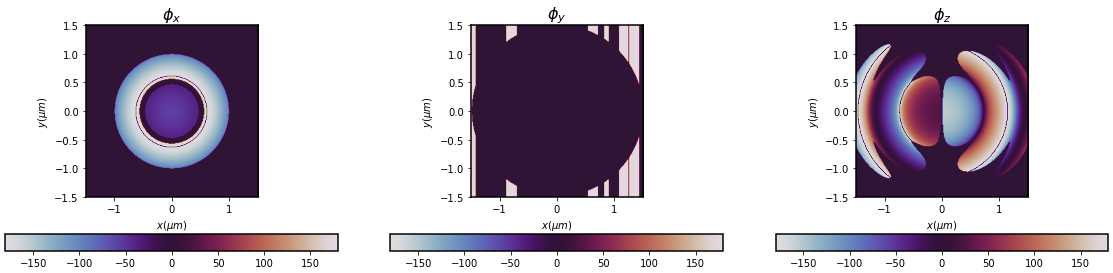

In [75]:
EM2.draw('phases');


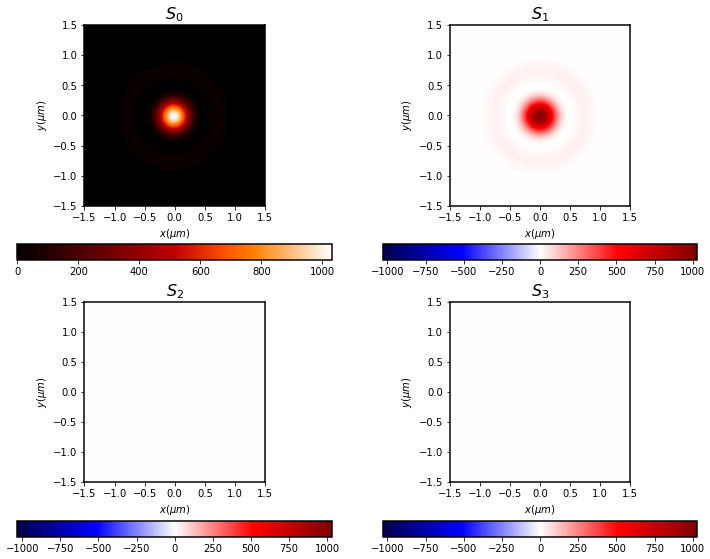

In [76]:
EM2.draw('stokes', logarithm=0);


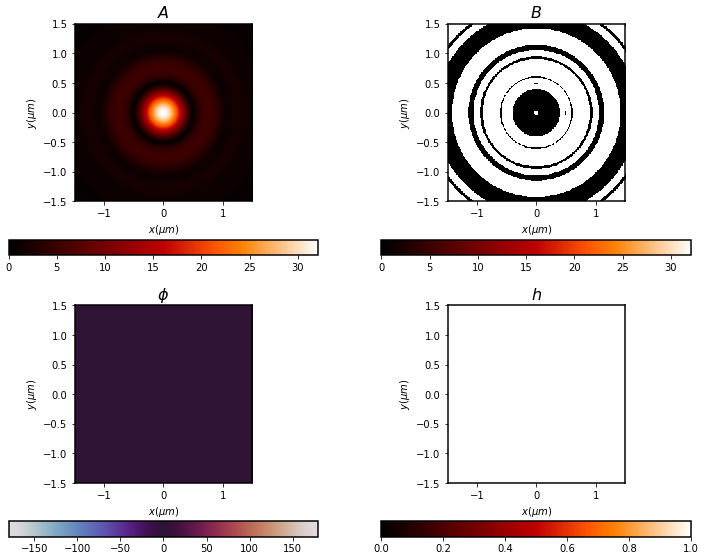

In [77]:
EM2.draw('param_ellipse');


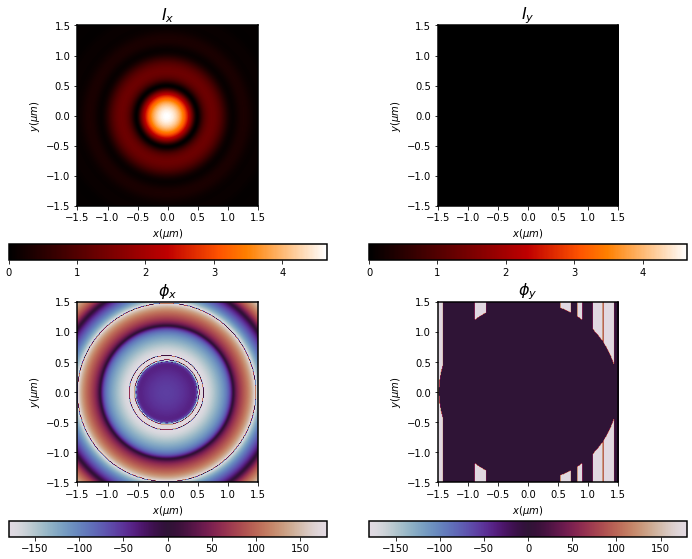

In [79]:
EM2.draw('fields', logarithm=1e-1);


## xout: 1D, yout: 1D, z: 1D


In [69]:
size_out = 2 * um
x_out = np.linspace(-size_out / 2, size_out / 2, 64)
y_out = np.linspace(-size_out / 2, size_out / 2, 64)
z = np.linspace(focal - 2 * um - 6 * um, focal - 2 * um + 6 * um, 16)


In [ ]:
%%time
EM2=EM1.CZT(z, x_out, y_out)


ImportError: cannot import name 'Vector_field_XYZ' from 'diffractio.vector_fields_XYZ' (/home/luismiguel/bitbucket/diffractio/diffractio/vector_fields_XYZ.py)